# Bitcoin Data Analysis

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("btcdata.csv")
df = df.dropna() #remove rows with no value
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df = df.set_index('Timestamp')


### BTC Plot on all time

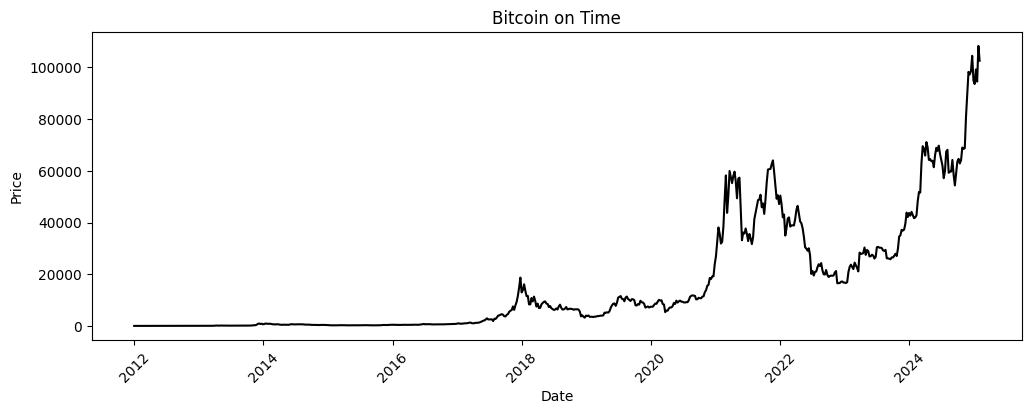

In [32]:
#Data we want to show (here the average at every monthly close)
#df_daily = df['Close'].resample('D').mean()

#Here first value every week
df_daily = df['Open'].resample('W').first()

plt.figure(figsize=(12, 4))
plt.plot(df_daily.index, df_daily.values, color="black")
plt.title('Bitcoin on Time') ; plt.xlabel('Date') ; plt.ylabel('Price')
plt.xticks(rotation=45) #to make the year text rotate a bit (more readable)
plt.show()

### BTC data analysis (changes per days) on last 1, 3, 5 and 10 years

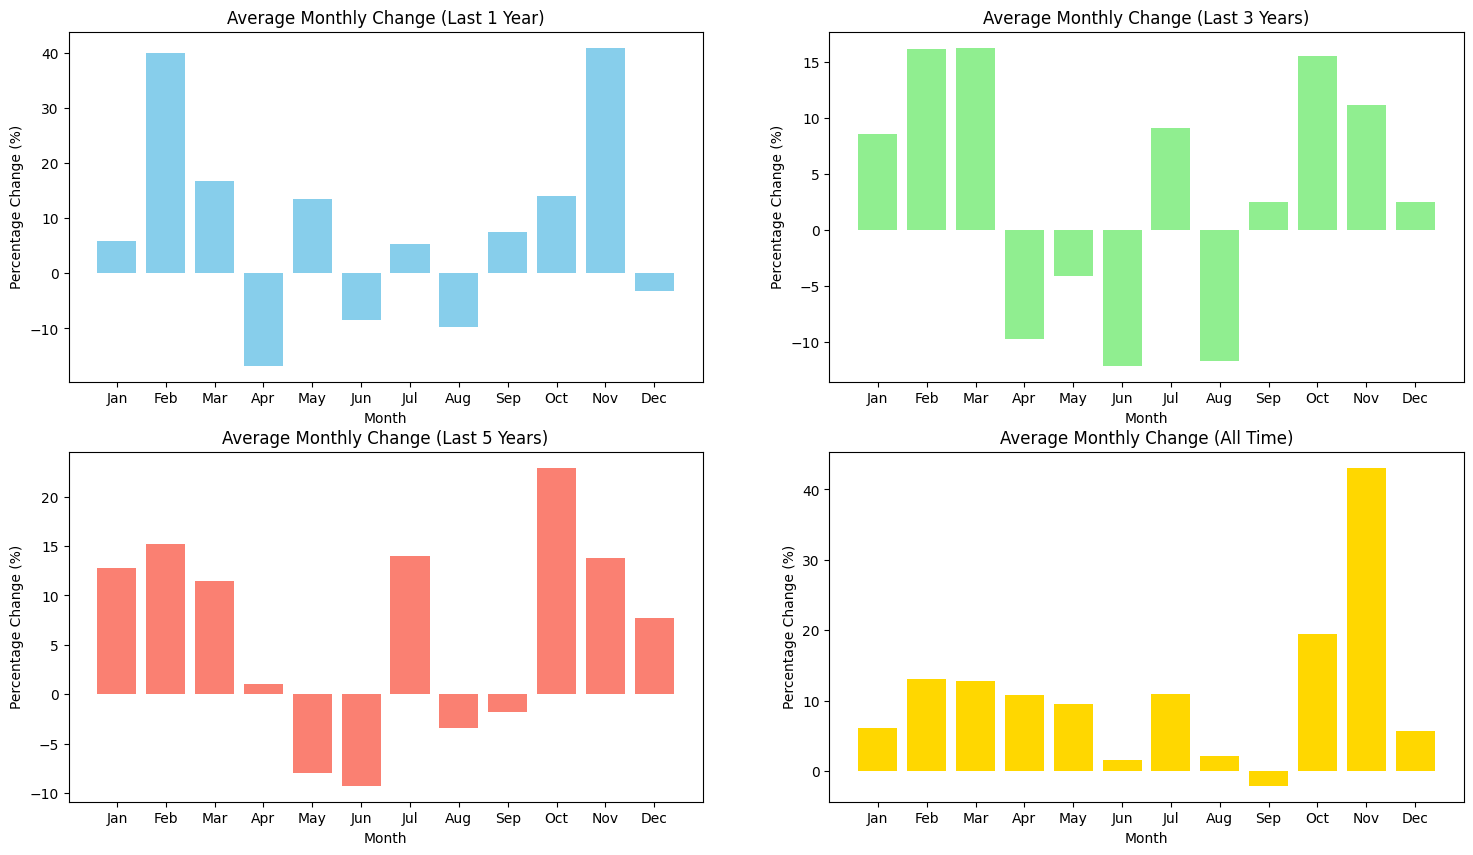

In [33]:
df_monthly = df['Close'].resample('M').agg(['first', 'last']).copy()
df_monthly['Change'] = ((df_monthly['last'] - df_monthly['first']) / df_monthly['first']) * 100


def calculate_average_monthly_change(data, years=None):
    if years:
        # Calculate the cutoff date
        cutoff_date = data.index.max() - pd.DateOffset(years=years)
        # Filter the data.
        data = data[data.index >= cutoff_date]

    data_copy = data.copy()
    data_copy['Month'] = data_copy.index.month

    average_change = data_copy.groupby('Month')['Change'].mean()
    return average_change


avg_change_1y = calculate_average_monthly_change(df_monthly, years=1)
avg_change_3y = calculate_average_monthly_change(df_monthly, years=3)
avg_change_5y = calculate_average_monthly_change(df_monthly, years=5)
avg_change_all = calculate_average_monthly_change(df_monthly)


fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[0].bar(month_labels, avg_change_1y, color='skyblue')
axes[0].set_title('Average Monthly Change (Last 1 Year)')
axes[0].set_ylabel('Percentage Change (%)') ; axes[0].set_xlabel('Month')

axes[1].bar(month_labels, avg_change_3y, color='lightgreen')
axes[1].set_title('Average Monthly Change (Last 3 Years)')
axes[1].set_ylabel('Percentage Change (%)') ; axes[1].set_xlabel('Month')

axes[2].bar(month_labels, avg_change_5y, color='salmon')
axes[2].set_title('Average Monthly Change (Last 5 Years)')
axes[2].set_ylabel('Percentage Change (%)') ; axes[2].set_xlabel('Month')

axes[3].bar(month_labels, avg_change_all, color='gold')
axes[3].set_title('Average Monthly Change (All Time)')
axes[3].set_ylabel('Percentage Change (%)') ; axes[3].set_xlabel('Month')

plt.show()

### BTC hourly change for each year

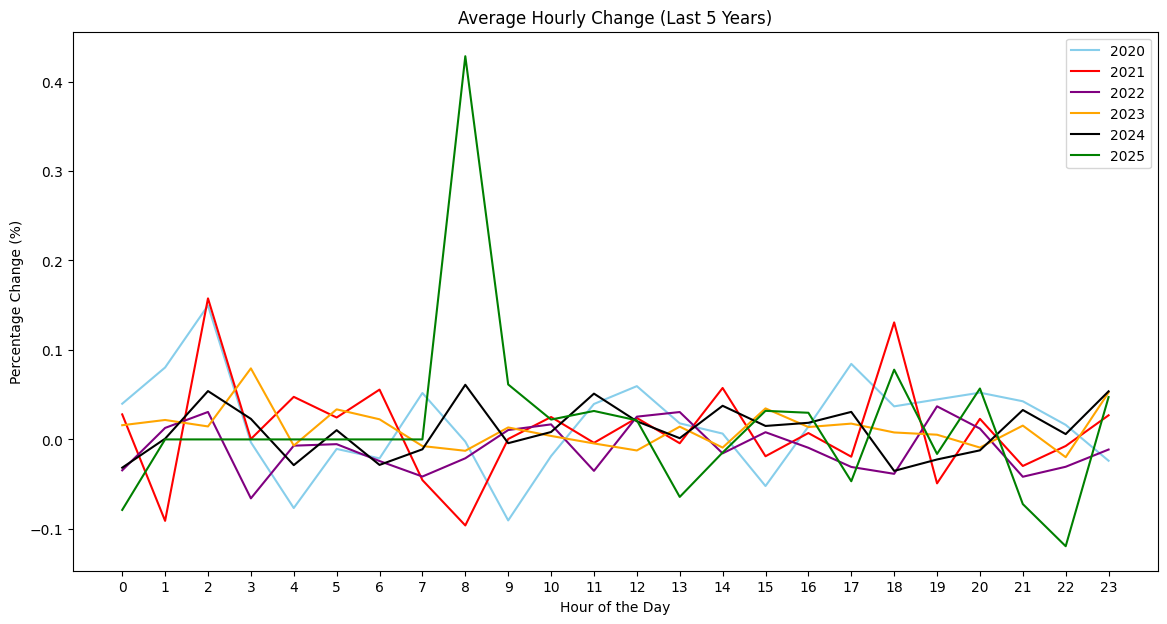

In [ ]:
df_hourly = df['Close'].resample('H').asfreq()
df_hourly = df_hourly.pct_change() * 100

def calculate_average_hourly_change_last_n_years(data, years):
    """Calculates the average hourly percentage change for the last n years."""
    data_copy = data.copy()
    data_copy = data_copy.reset_index()

    cutoff_date = data_copy['Timestamp'].max() - pd.DateOffset(years=years)
    data_copy = data_copy[data_copy['Timestamp'] >= cutoff_date]

    data_copy['Year'] = data_copy['Timestamp'].dt.year
    data_copy['Hour'] = data_copy['Timestamp'].dt.hour
    data_copy = data_copy.set_index('Timestamp')

    average_change = data_copy.groupby(['Year', 'Hour'])['Close'].mean()  #Group by Year and Hour
    return average_change

avg_hourly_change_5y = calculate_average_hourly_change_last_n_years(df_hourly, 5)

fig, ax = plt.subplots(figsize=(14, 7))

years = avg_hourly_change_5y.index.get_level_values('Year').unique()
colors = ["skyblue", "red", "purple", "orange", "black", "green"]

for i, year in enumerate(years):
  yearly_data = avg_hourly_change_5y.loc[year]
  ax.plot(yearly_data.index, yearly_data.values, color=colors[i], label=str(year))

ax.set_title('Average Hourly Change (Last 5 Years)')
ax.set_ylabel('Percentage Change (%)')
ax.set_xlabel('Hour of the Day')
ax.set_xticks(range(24))
ax.legend()

plt.show()